In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

import requests as re

sns.set_context('poster')
sns.set_style('whitegrid')

import statsmodels.formula.api as smf

In [2]:
df = pd.read_json('./rawData/cleaned.json')

In [3]:
df.interest_level.value_counts()

low       29147
medium     9491
high       3280
Name: interest_level, dtype: int64

In [4]:
df.interestVal.value_counts()

0.0    29147
0.5     9491
1.0     3280
Name: interestVal, dtype: int64

In [5]:
linReg = df.select_dtypes(exclude=['object'])

equation = ('+').join(linReg.drop(['interestVal'], axis=1).columns)
model = smf.ols('interestVal~'+equation, data=linReg).fit()

In [6]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            interestVal   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     96.70
Date:                Sat, 02 Dec 2017   Prob (F-statistic):               0.00
Time:                        17:38:05   Log-Likelihood:                -9434.2
No. Observations:               41918   AIC:                         1.893e+04
Df Residuals:                   41887   BIC:                         1.920e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.5043      0.130      3.872      0.000       0.249       0.760
Balcony                  0.0035      0.007      0.471      0.638      -0.011       0.018
Cats_Allowed             0.0161      0.008      1.896      0.058      -0.001       0.033
Common_Outdoor_Space     0.0989      0.010      9.967      0.000       0.079       0.118
Dining_Room              0.0153      0.006      2.757      0.006       0.004       0.026
Dishwasher              -0.0073      0.004     -1.668      0.095      -0.016       0.001
Dogs_Allowed            -0.0374      0.009     -4.358      0.000      -0.054      -0.021
Doorman                 -0.0779      0.004    -17.542      0.000      -0.087      -0.069
Elevator                -0.0042      0.004     -1.009      0.313      -0.012       0.004
Exclusive                0.0437      0.007      5.850      0.000       0.029       0.058
Fitness_Center          -0.0381      0.005     -7.980      0.000      -0.047      -0.029
Garden_Patio             0.0056      0.009      0.634      0.526      -0.012       0.023
Hardwood_Floors          0.0551      0.004     13.146      0.000       0.047       0.063
High_Speed_Internet      0.0442      0.007      6.542      0.000       0.031       0.057
Laundry_in_Unit         -0.0214      0.005     -4.689      0.000      -0.030      -0.012
Loft                     0.0165      0.008      2.201      0.028       0.002       0.031
New_Construction        -0.0029      0.008     -0.374      0.709      -0.018       0.012
No_Fee                   0.0786      0.004     22.142      0.000       0.072       0.086
Outdoor_Space            0.0243      0.006      3.943      0.000       0.012       0.036
Pre_War                 -0.0362      0.004     -9.285      0.000      -0.044      -0.029
Roof_Deck               -0.0072      0.006     -1.278      0.201      -0.018       0.004
Swimming_Pool            0.0047      0.007      0.658      0.511      -0.009       0.019
Terrace                  0.0014      0.009      0.159      0.874      -0.016       0.019
Wheelchair_Access       -0.0009      0.010     -0.088      0.930      -0.021       0.019
bathrooms               -0.0733      0.004    -19.985      0.000      -0.081      -0.066
bedrooms                 0.0152      0.002      9.222      0.000       0.012       0.018
latitude                 0.0026      0.009      0.303      0.762      -0.014       0.020
laundry_in_building      0.0504      0.004     12.165      0.000       0.042       0.058
listing_id            -5.04e-08   1.18e-08     -4.288      0.000   -7.34e-08   -2.74e-08
longitude                0.0003      0.005      0.054      0.957      -0.009       0.009
price                -1.855e-07   6.36e-08     -2.915      0.004    -3.1e-07   -6.08e-08
=========================================================

In [7]:
typed = pd.read_json('./typedData/train_typed.json')

In [8]:
typed.columns

Index(['Balcony', 'Cats_Allowed', 'Common_Outdoor_Space', 'Dining_Room',
       'Dishwasher', 'Dogs_Allowed', 'Doorman', 'Elevator', 'Exclusive',
       'Fitness_Center', 'Garden_Patio', 'Hardwood_Floors',
       'High_Speed_Internet', 'Laundry_in_Unit', 'New_Construction', 'No_Fee',
       'Outdoor_Space', 'Pre_War', 'Roof_Deck', 'Swimming_Pool', 'Terrace',
       'Wheelchair_Access', 'apartment', 'bathrooms', 'bedrooms',
       'building_id', 'condominium', 'created', 'description',
       'display_address', 'features', 'foundType', 'interestVal',
       'interest_level', 'latitude', 'laundry_in_building', 'listing_id',
       'loft', 'longitude', 'manager_id', 'other', 'ph', 'price',
       'street_address', 'studio', 'townhome', 'type', 'walk_up'],
      dtype='object')

In [9]:
linReg = typed.select_dtypes(exclude=['object'])

equation = ('+').join(linReg.drop(['interestVal'], axis=1).columns)
model = smf.ols('interestVal~'+equation, data=linReg).fit()

In [10]:
equation

'Balcony+Cats_Allowed+Common_Outdoor_Space+Dining_Room+Dishwasher+Dogs_Allowed+Doorman+Elevator+Exclusive+Fitness_Center+Garden_Patio+Hardwood_Floors+High_Speed_Internet+Laundry_in_Unit+New_Construction+No_Fee+Outdoor_Space+Pre_War+Roof_Deck+Swimming_Pool+Terrace+Wheelchair_Access+apartment+bathrooms+bedrooms+condominium+foundType+latitude+laundry_in_building+listing_id+loft+longitude+other+ph+price+studio+townhome+walk_up'

In [11]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            interestVal   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     54.29
Date:                Sat, 02 Dec 2017   Prob (F-statistic):               0.00
Time:                        17:38:07   Log-Likelihood:                -4580.2
No. Observations:               19783   AIC:                             9234.
Df Residuals:                   19746   BIC:                             9526.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.1813      0.088      2.068      0.039       0.009       0.353
foundType[T.True]        0.1813      0.088      2.068      0.039       0.009       0.353
Balcony                 -0.0080      0.010     -0.770      0.442      -0.028       0.012
Cats_Allowed             0.0270      0.013      2.095      0.036       0.002       0.052
Common_Outdoor_Space     0.0964      0.015      6.549      0.000       0.068       0.125
Dining_Room              0.0242      0.008      3.095      0.002       0.009       0.040
Dishwasher              -0.0029      0.006     -0.466      0.641      -0.015       0.009
Dogs_Allowed            -0.0472      0.013     -3.633      0.000      -0.073      -0.022
Doorman                 -0.0723      0.007    -10.929      0.000      -0.085      -0.059
Elevator                 0.0048      0.006      0.770      0.441      -0.007       0.017
Exclusive                0.0897      0.012      7.314      0.000       0.066       0.114
Fitness_Center          -0.0315      0.007     -4.448      0.000      -0.045      -0.018
Garden_Patio            -0.0114      0.012     -0.921      0.357      -0.036       0.013
Hardwood_Floors          0.0396      0.006      6.578      0.000       0.028       0.051
High_Speed_Internet      0.0488      0.010      5.113      0.000       0.030       0.068
Laundry_in_Unit         -0.0023      0.006     -0.352      0.725      -0.015       0.010
New_Construction        -0.0165      0.011     -1.468      0.142      -0.039       0.006
No_Fee                   0.0751      0.005     14.805      0.000       0.065       0.085
Outdoor_Space            0.0186      0.009      2.149      0.032       0.002       0.036
Pre_War                 -0.0469      0.006     -8.525      0.000      -0.058      -0.036
Roof_Deck               -0.0162      0.008     -2.015      0.044      -0.032      -0.000
Swimming_Pool            0.0061      0.010      0.613      0.540      -0.013       0.026
Terrace                  0.0287      0.012      2.320      0.020       0.004       0.053
Wheelchair_Access       -0.0196      0.014     -1.362      0.173      -0.048       0.009
apartment                0.0417      0.027      1.568      0.117      -0.010       0.094
bathrooms               -0.0130      0.006     -2.026      0.043      -0.026      -0.000
bedrooms                 0.0299      0.003     11.718      0.000       0.025       0.035
condominium              0.0644      0.033      1.966      0.049       0.000       0.129
latitude                -0.0318      0.029     -1.100      0.271      -0.088       0.025
laundry_in_building      0.0389      0.006      6.540      0.000       0.027       0.051
listing_id           -3.994e-08   1.72e-08     -2.329      0.020   -7.36e-08   -6.32e-09
loft                     0.0079      0.010      0.755    

In [12]:
allInfo = pd.read_json('./typedData/compsTypedInteraction.json')

In [24]:
allInfo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41918 entries, 0 to 9999
Data columns (total 68 columns):
Balcony                  41918 non-null int64
Cats_Allowed             41918 non-null int64
Common_Outdoor_Space     41918 non-null int64
Dining_Room              41918 non-null int64
Dishwasher               41918 non-null int64
Dogs_Allowed             41918 non-null int64
Doorman                  41918 non-null int64
Elevator                 41918 non-null int64
Exclusive                41918 non-null int64
Fitness_Center           41918 non-null int64
Garden_Patio             41918 non-null int64
Hardwood_Floors          41918 non-null int64
High_Speed_Internet      41918 non-null int64
Laundry_in_Unit          41918 non-null int64
New_Construction         41918 non-null int64
No_Fee                   41918 non-null int64
Outdoor_Space            41918 non-null int64
Pre_War                  41918 non-null int64
Roof_Deck                41918 non-null int64
Swimming_Pool     

In [19]:
from sklearn.linear_model import LassoCV, Lasso
from sklearn.model_selection import train_test_split

In [28]:
def olsModel(data, hometype):
    subset = data[data[hometype] == 1]
    linReg = subset.select_dtypes(exclude=['object'])
    
    X_train, X_test, y_train, y_test = train_test_split(linReg.drop('interestVal', axis=1), 
                                                    linReg['interestVal'], test_size=0.33, 
                                                    random_state=42)
    
    cols = X_train.columns
    cols = [x for x in cols if 'avg' not in x]
    equation = ('+').join(cols)
    
    train = pd.concat([X_train, y_train], axis=1)
    
    model = smf.ols('interestVal~'+equation, data=train).fit()
    preds = model.predict(X_test)
    preds = pd.concat([preds, y_test], axis=1)
    return model, preds

In [64]:
studioOLS, studioPreds = olsModel(allInfo, 'studio')
townhomeOLS, townhomePreds= olsModel(allInfo, 'townhome')
walkUpOLS, walkUpPreds = olsModel(allInfo, 'walk_up')
condoOLS, condoPreds = olsModel(allInfo, 'condominium')
phOLS, phPreds = olsModel(allInfo, 'ph')
loftOLS, loftPreds = olsModel(allInfo, 'loft')
otherOLS, otherPreds = olsModel(allInfo, 'other')


print('Studio Adjusted R-Squared: {}'.format(np.round(studioOLS.rsquared_adj, 4)))
print('Townhome Adjusted R-Squared: {}'.format(np.round(townhomeOLS.rsquared_adj, 4)))
print('Walk-Up Adjusted R-Squared: {}'.format(np.round(walkUpOLS.rsquared_adj, 4)))
print('Condo Adjusted R-Squared: {}'.format(np.round(condoOLS.rsquared_adj, 4)))
print('Penthouse Adjusted R-Squared: {}'.format(np.round(phOLS.rsquared_adj, 4)))
print('Loft Adjusted R-Squared: {}'.format(np.round(loftOLS.rsquared_adj, 4)))
print('Other Adjusted R-Squared: {}'.format(np.round(otherOLS.rsquared_adj, 4)))

Studio Adjusted R-Squared: 0.1274
Townhome Adjusted R-Squared: 0.0238
Walk-Up Adjusted R-Squared: 0.196
Condo Adjusted R-Squared: 0.1054
Penthouse Adjusted R-Squared: 0.1599
Loft Adjusted R-Squared: 0.1326
Other Adjusted R-Squared: 0.0737


In [30]:
lassoData = allInfo.select_dtypes(exclude=['object'])
X_train, X_test, y_train, y_test = train_test_split(lassoData.drop('interestVal', axis=1), 
                                                    lassoData['interestVal'], test_size=0.33, 
                                                    random_state=42)

In [31]:
n = int(np.floor(.75*len(allInfo)))

In [32]:
s = np.random.choice(allInfo.index, n) 
train = allInfo.iloc[s]
test = allInfo[~allInfo.index.isin(train.index)]

In [61]:
def lassoType(data, hometype):
    subset = data[data[hometype] == 1]
    linReg = subset.select_dtypes(exclude=['object'])
    X_train, X_test, y_train, y_test = train_test_split(linReg.drop('interestVal', axis=1), 
                                                        linReg['interestVal'], test_size=0.33, 
                                                        random_state=42)
    
    lasso = Lasso(max_iter=10000, normalize=True)

    lassocv = LassoCV(alphas=None, cv=10, max_iter=100000, normalize=True)
    lassocv.fit(X_train, y_train)
    
    lasso.set_params(alpha=lassocv.alpha_)
    lasso.fit(X_train, y_train)
    
    preds = lasso.predict(X_test)
    preds = pd.concat([pd.Series(preds), y_test.reset_index(drop=True)], axis=1)
    
    return lasso, preds

In [65]:
studioLasso, studioLCVPreds = lassoType(allInfo, 'studio')
townhomeLasso, townhomeLCVPreds = lassoType(allInfo, 'townhome')
walk_upLasso, walk_upLCVPreds = lassoType(allInfo, 'walk_up')
condoLasso, condoLCVPreds = lassoType(allInfo, 'condominium')
phLasso, phLCVPreds = lassoType(allInfo, 'ph')
loftLasso, loftLCVPreds = lassoType(allInfo, 'loft')
otherLasso, otherLCVPreds = lassoType(allInfo, 'other')

# Attempt to reclassify outputs

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

In [67]:
studioPreds.head()

,0,interestVal
39844,0.245922,0.5
38051,0.166337,0.0
37459,0.178924,0.0
39011,0.263168,0.5
38748,0.323242,0.0


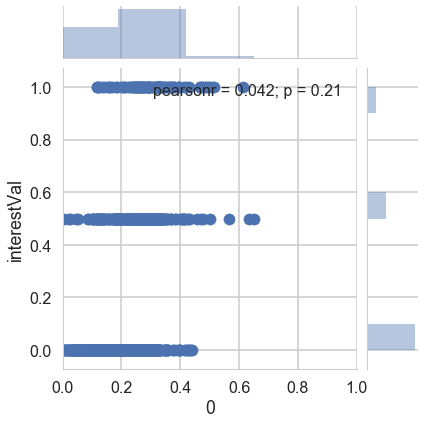

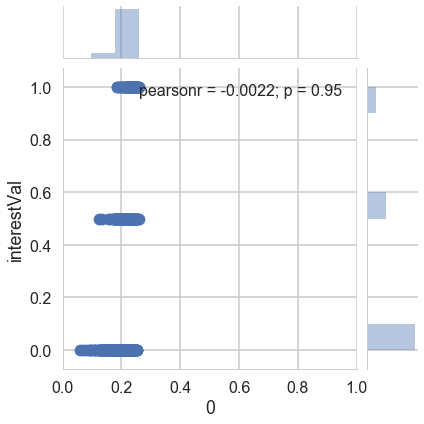

In [81]:
sns.jointplot(x=0, y='interestVal', data=studioPreds, xlim=[0,1])
sns.jointplot(x=0, y='interestVal', data=studioLCVPreds, xlim=[0,1])

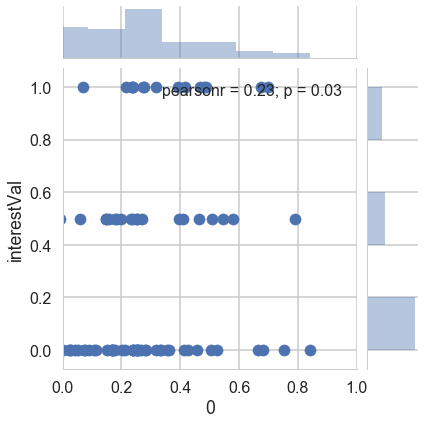

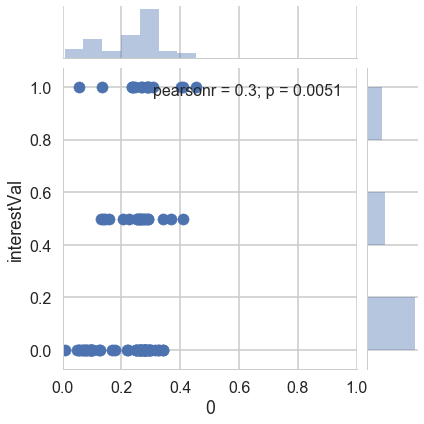

In [83]:
sns.jointplot(x=0, y='interestVal', data=walkUpPreds, xlim=[0,1])
sns.jointplot(x=0, y='interestVal', data=walk_upLCVPreds, xlim=[0,1])

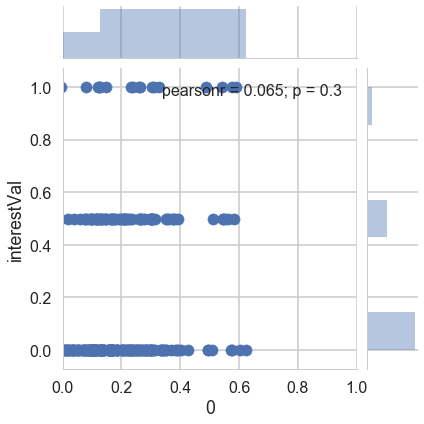

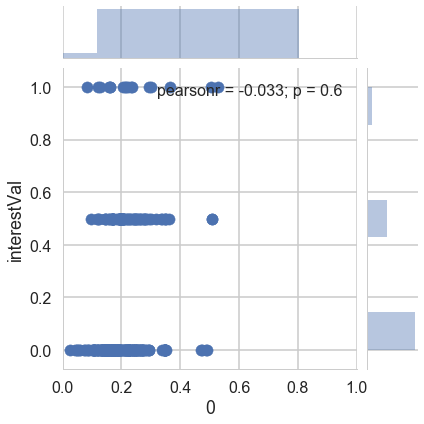

In [84]:
sns.jointplot(x=0, y='interestVal', data=phPreds, xlim=[0,1])
sns.jointplot(x=0, y='interestVal', data=phLCVPreds, xlim=[0,1])